In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import ggplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
df = sns.load_dataset('iris', data_home='./data/')
X = df.values[:,:4] #Don't use labels, do as unpuervised
X_std=StandardScaler().fit_transform(np.array(X))

/Users/harinisridhar/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
X_std.shape

(150, 4)

## Compute PCA manually

In [12]:
mean_vec = X_std.mean(axis=0)
print 'Mean vector \n%s \n' %mean_vec

Mean vector 
[ -4.73695157e-16  -7.81597009e-16  -4.26325641e-16  -4.73695157e-16] 



In [13]:
cov_mat=(X_std - mean_vec).T.dot((X_std - mean_vec))/ (X_std.shape[0]-1)  #matrix square is equivalent to Xtranspose.X
# the denominator is N-1 for variance. Will be explained later
print 'Covariance matrix \n%s\n' %cov_mat

Covariance matrix 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]



In [17]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print 'Eigenvalues \n%s \n' %eig_vals
print 'Eigenvecs \n%s \n' %eig_vecs #every column vector corresponds to one eigen vector

Eigenvalues 
[ 2.93808505  0.9201649   0.14774182  0.02085386] 

Eigenvecs 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]] 



In [18]:
ids = np.argsort(-eig_vals)[:2]
Y_pca = X_std.dot(eig_vecs[:,ids])

In [19]:
Y_pca.shape

(150, 2)

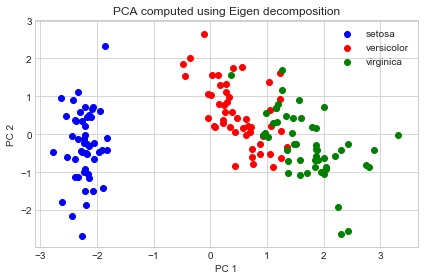

In [21]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for lab, col in zip(('setosa', 'versicolor', 'virginica'), ('blue', 'red', 'green')):
        plt.scatter(Y_pca[df['species'] ==lab, 0], #matrix access using two dimensions
                    Y_pca[df['species'] ==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title('PCA computed using Eigen decomposition')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
        

## Using sklearn for PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Y_pca_sk = pca.fit_transform(X_std)

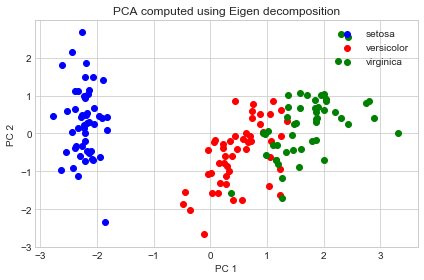

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for lab, col in zip(('setosa', 'versicolor', 'virginica'), ('blue', 'red', 'green')):
        plt.scatter(Y_pca_sk[df['species'] ==lab, 0], #matrix access using two dimensions
                    Y_pca_sk[df['species'] ==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title('PCA computed using Eigen decomposition')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
        

In [24]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

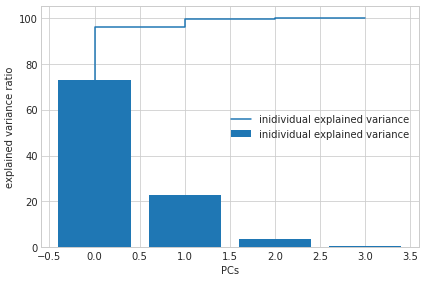

In [35]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    plt.bar(range(4),var_exp, label='inidividual explained variance')#, align='center')
    plt.step(range(4), cum_var_exp, label='inidividual explained variance')
    
    plt.ylabel('explained variance ratio')
    plt.xlabel('PCs')
    plt.legend(loc='best')
    plt.tight_layout()